### Problem Statement
HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. Provided with a dataset named "country_data.csv", which includes various features. The dataset comprises the following columns:

- country: Name of the country.
- child_mort: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
- exports: Exports of goods and services as a percentage of the country's GDP.
- health: Health expenditure as a percentage of the country's GDP.
- imports: Imports of goods and services as a percentage of the country's GDP.
- income: Net income per person in USD.
- inflation: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
- life_expec: Life expectancy at birth, indicating the number of years a newborn is expected to live.
- total_fer: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
- gdpp: GDP per capita in USD, representing the average economic output per person.
    
Task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

**Import Necessary Libraries**

In [1]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Data Preparation and Exploration

In [2]:
# Import the dataset
df = pd.read_csv("country_data.csv")

# Display the number of rows and columns
print("The number of rows and columns:", df.shape)

# Display the first few rows of the dataset in dataframe format
print("First few rows of the dataset:")
df.head()

The number of rows and columns: (167, 10)
First few rows of the dataset:


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# Basic statistics for every feature
print("Statistical summary for each feature:")
df.describe()

Statistical summary for each feature:


child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

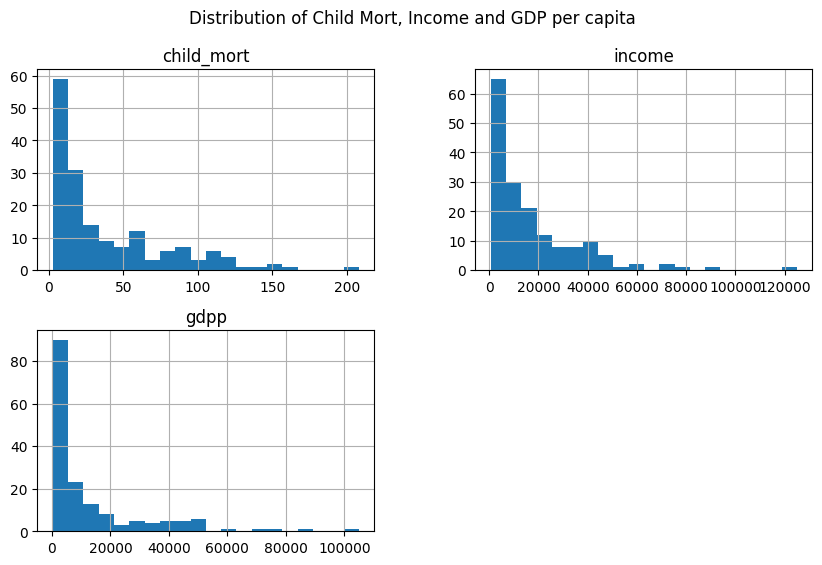

In [4]:
# Visulaize the distribution for 'child_mort', 'income', 'gdpp'
df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10,6))
plt.suptitle("Distribution of Child Mort, Income and GDP per capita")
plt.show()

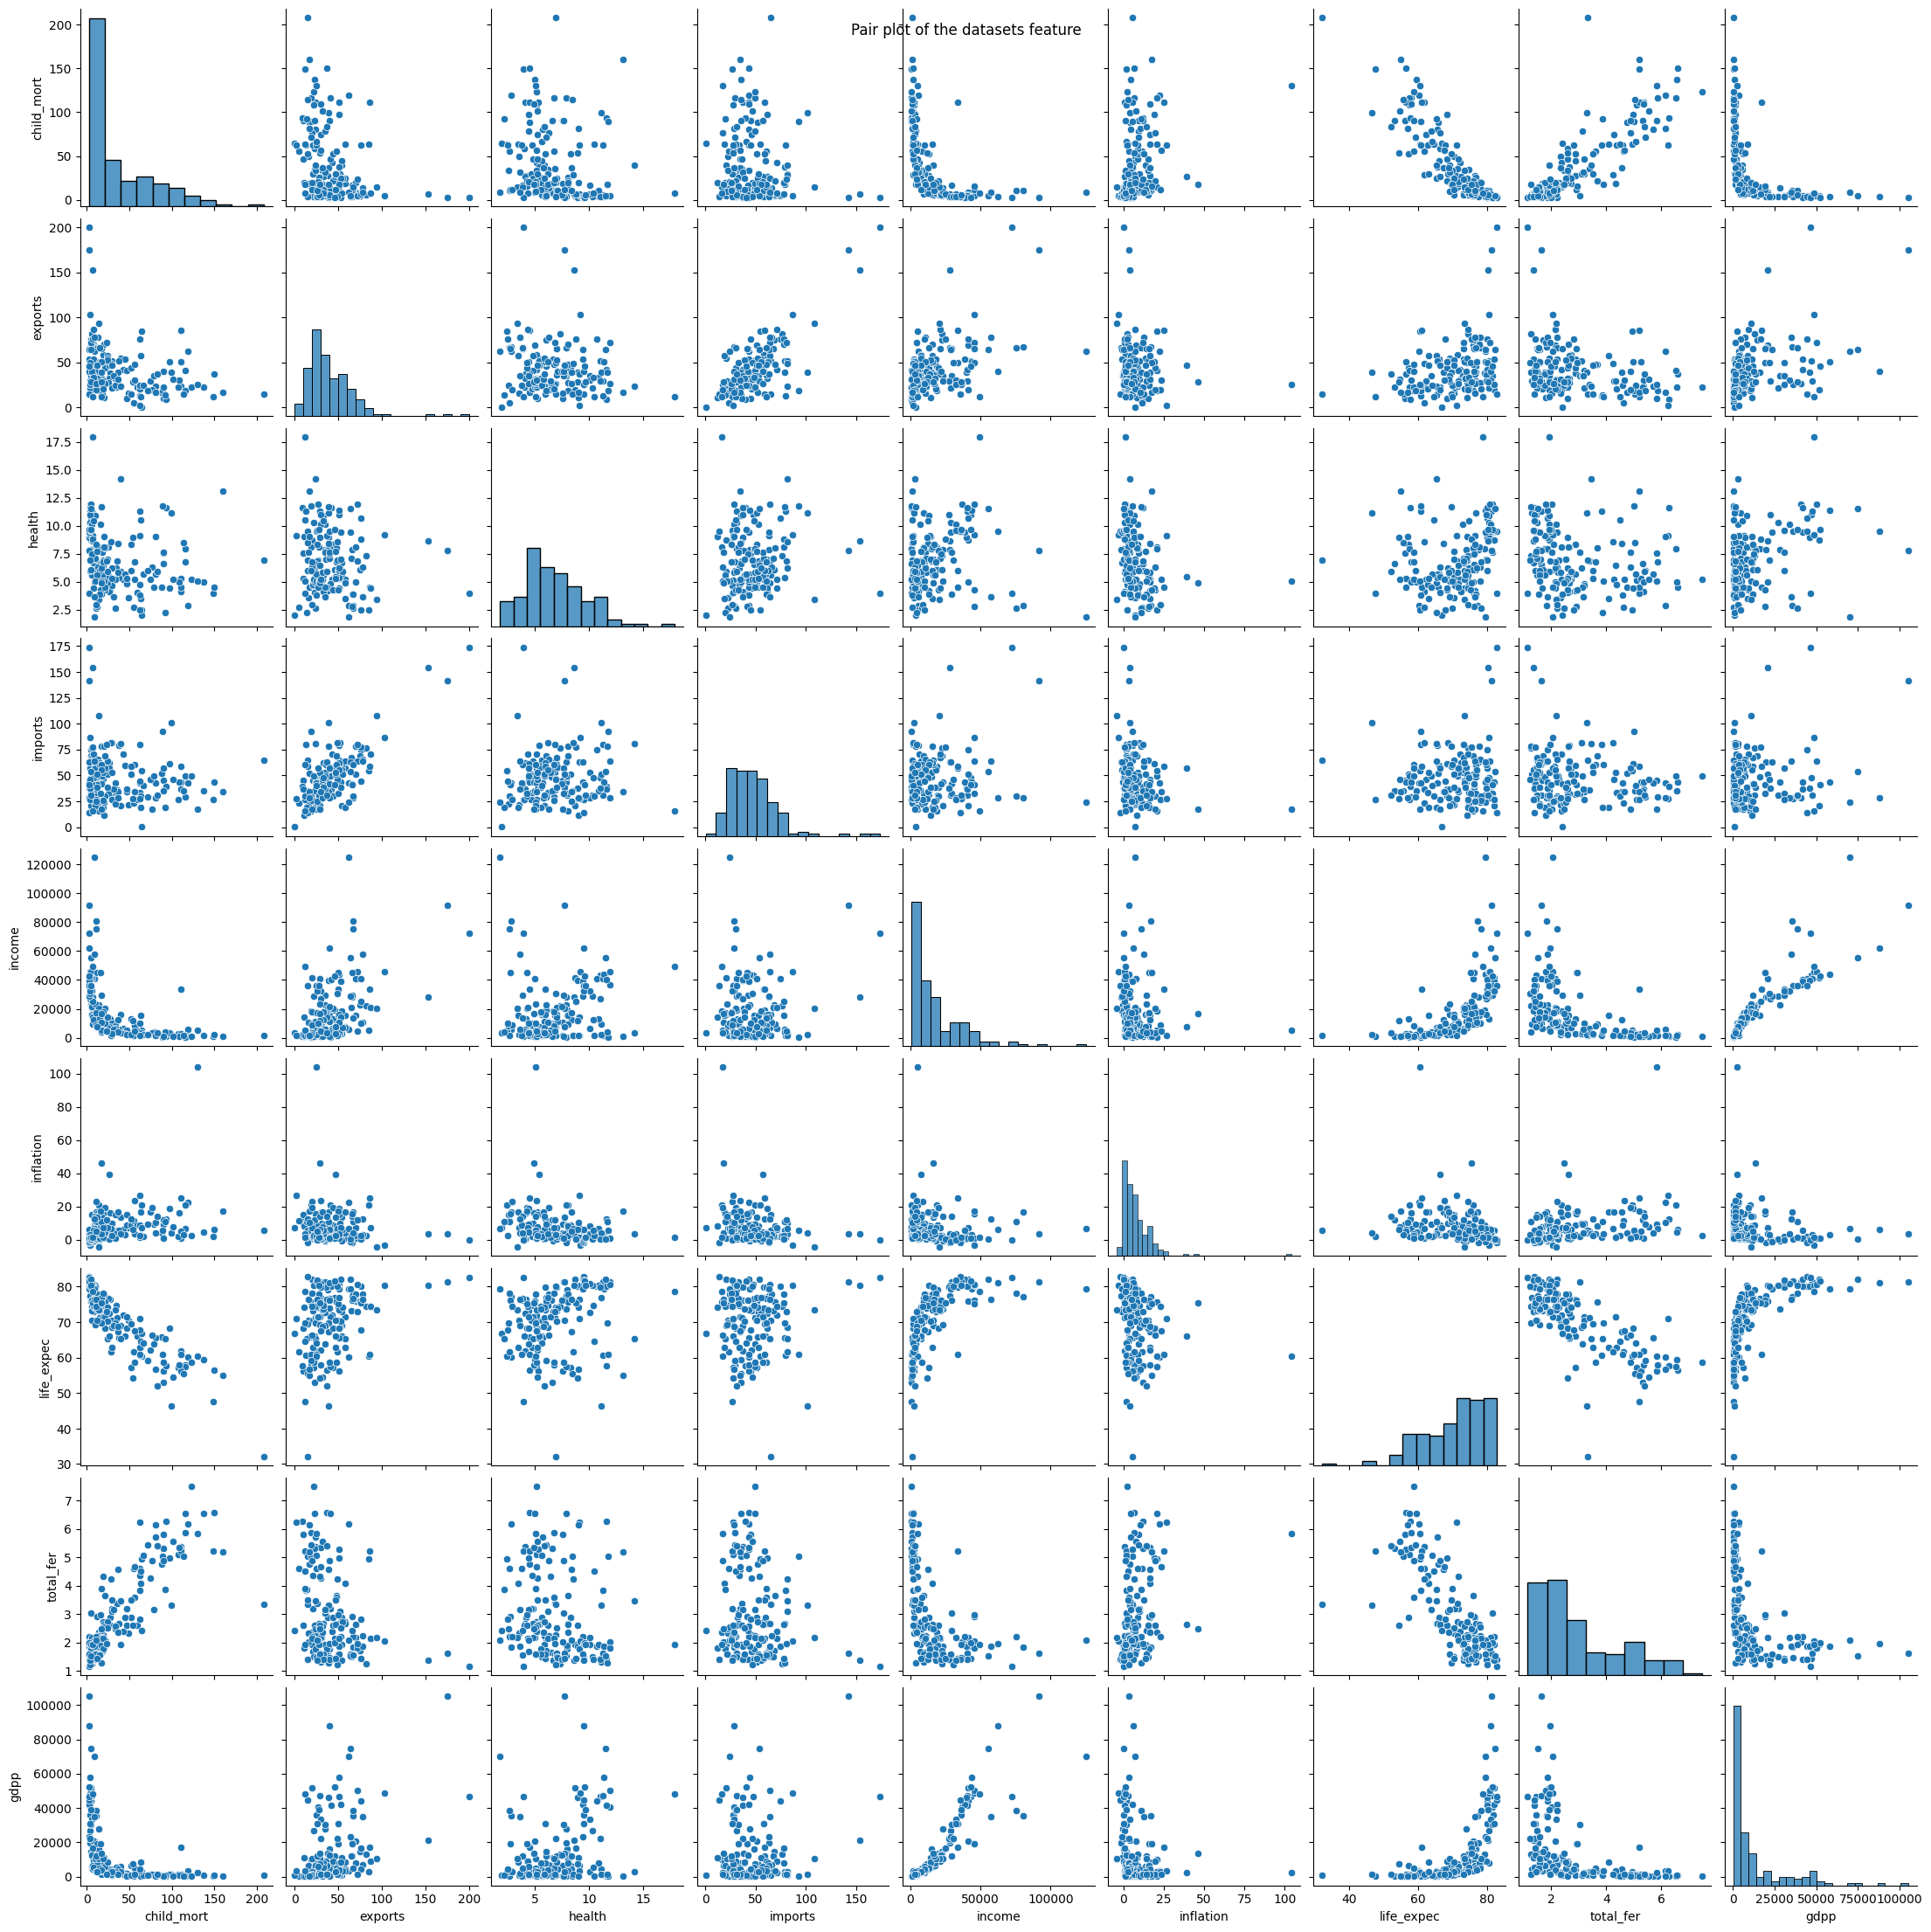

In [5]:
# Create pairplots to visulaize relationship between features
sns.pairplot(df)
plt.suptitle("Pair plot of the datasets feature")
plt.show()

### K-Means Clustering

In [6]:
# Drop the 'country' columns since it's not numerical feature
df_cluster1 = df.drop('country',axis=1)

# Standardize the numerical features
scaler = StandardScaler()
features = ['child_mort','exports',	'health', 'imports', 'income', 'inflation',	'life_expec', 'total_fer', 'gdpp']
df_cluster1[features] = scaler.fit_transform(df_cluster1[features])

# Check few rows
df_cluster1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [7]:
# Perform KMeans clustering with n_clusters as 4
km = KMeans(n_clusters=4, n_init='auto')

# Fit the KMeans model to the data
km.fit(df_cluster1[features])

KMeans(n_clusters=4)

In [8]:
# Print the inertia nad centroids

# Inertia
print("Inertia:", km.inertia_)
print('*' * 50)

# Centroids
centroids = km.cluster_centers_
print(centroids)

Inertia: 700.3229986404376
**************************************************
[[-0.41982697  0.00664849 -0.21172363  0.04758146 -0.21727424 -0.03495325
   0.26841956 -0.43822217 -0.33080531]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]
 [-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]]


In [9]:
# Add the cluster label to the original Dataframe 'df'
df['Cluster'] = km.labels_
df.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        1  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        0

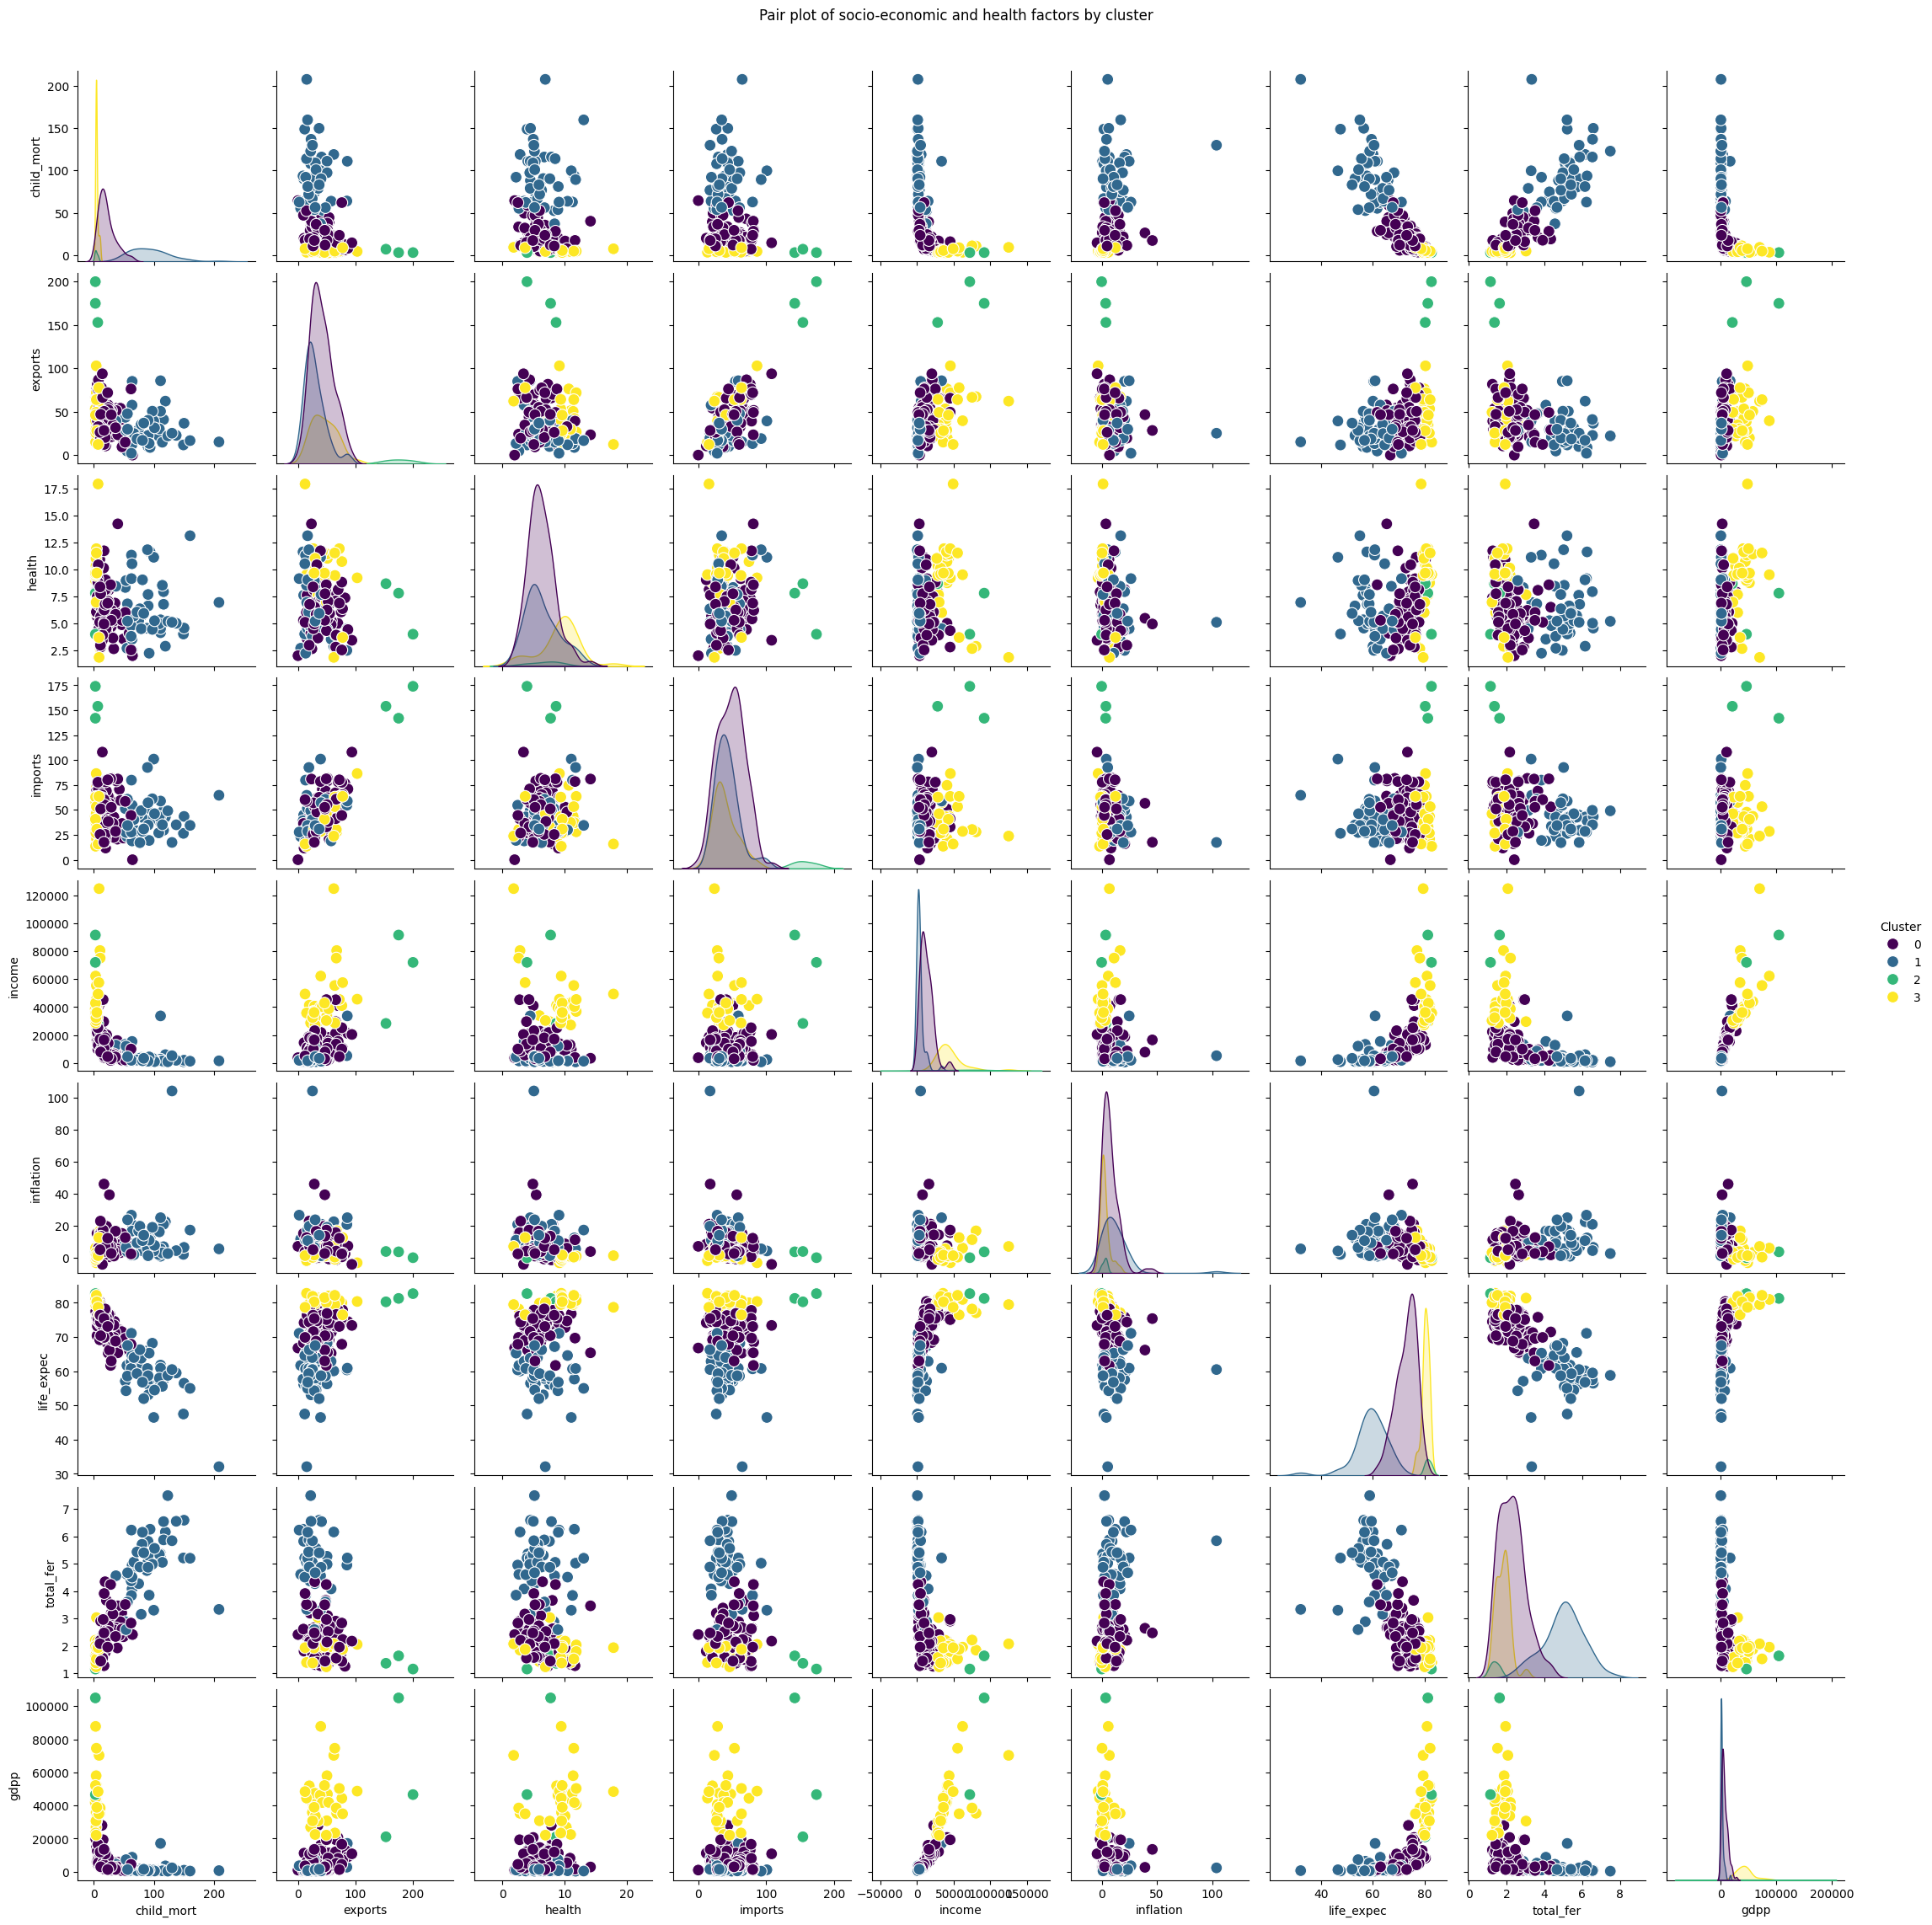

In [10]:
# Create a pairplot to visualize the relationship between all the relevant features, colored by cluster labels
pair_plot = sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws = {'s':100})
pair_plot.fig.suptitle("Pair plot of socio-economic and health factors by cluster", y=1.02)
plt.show()

### Elbow Method for Determining Optimal Clusters

[722.2998131860161, 670.7517342884497, 596.4945611271891, 535.6510201393576, 465.2822385822668, 426.7240757680631, 400.5404008293891, 390.48262088379033, 385.8032722927998, 355.2025164205281, 333.2663899778617]


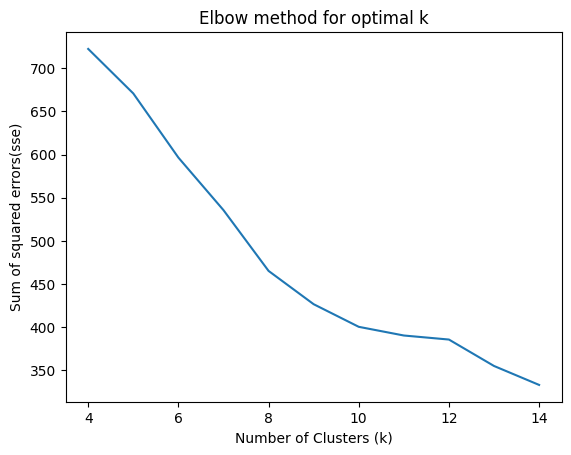

In [11]:
# Determine the optimal number of cluster using the Elbow Method
sse = []
k_rng = range(4, 15)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)

# Plot the Elbow method graph
plt.plot(k_rng, sse)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of squared errors(sse)")
plt.title("Elbow method for optimal k")
plt.show()

In [12]:
# Train the KMeans model using the number of clusters identified by the Elbow Method.

# Perform KMeans clustering withh optimal n_clusters
km = KMeans(n_clusters=6, n_init='auto')

# Fit the KMeans model to the data
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

# asigning the cluster values
df['Cluster'] = km.labels_

In [13]:
# Print the inertia and centroids

# Inertia
print("Inertia:", km.inertia_)
print('*' * 50)

# Centroids
centroids = km.cluster_centers_
print(centroids)

Inertia: 592.6988413965973
**************************************************
[[ 1.58793224 -0.47608551 -0.03569247 -0.03188577 -0.74034372  0.02559874
  -1.45091117  1.53146163 -0.63212077]
 [-0.51656529  0.72059495 -0.35617395  0.67325384  0.06735083 -0.27649354
   0.32658443 -0.46906526 -0.14365279]
 [-0.82830957  0.09058383  1.00952855 -0.40991269  1.52310836 -0.49904218
   1.13153629 -0.73587113  1.79246636]
 [-0.53207674 -0.41032986  0.22556495 -0.20053096 -0.25310209 -0.19258437
   0.41992402 -0.56548447 -0.31088304]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]
 [ 0.3250067  -0.41533686 -0.70354281 -0.66181182 -0.50420204  1.07468361
  -0.40724736  0.31115058 -0.52778283]]


### Hierarchial Clustering

In [14]:
# Apply Agglomerative Clustering (6 clusters, metric='cosine', linkage='complete')
hc = AgglomerativeClustering(n_clusters = 6, metric='cosine', linkage='complete')
hc.fit(df_cluster1)

# Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
df['Cluster_HC'] = hc.labels_
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  Cluster_HC  
0       9.44        56.2       5.82    553        0           4  
1       4.49        76.3       1.65   4090        3           0  
2      16.10        76.5       2.89   4460        5           1  
3      22.40        60.1       6.16   3530        0           5  
4       1.44        76.8       2.13  12200        1           0

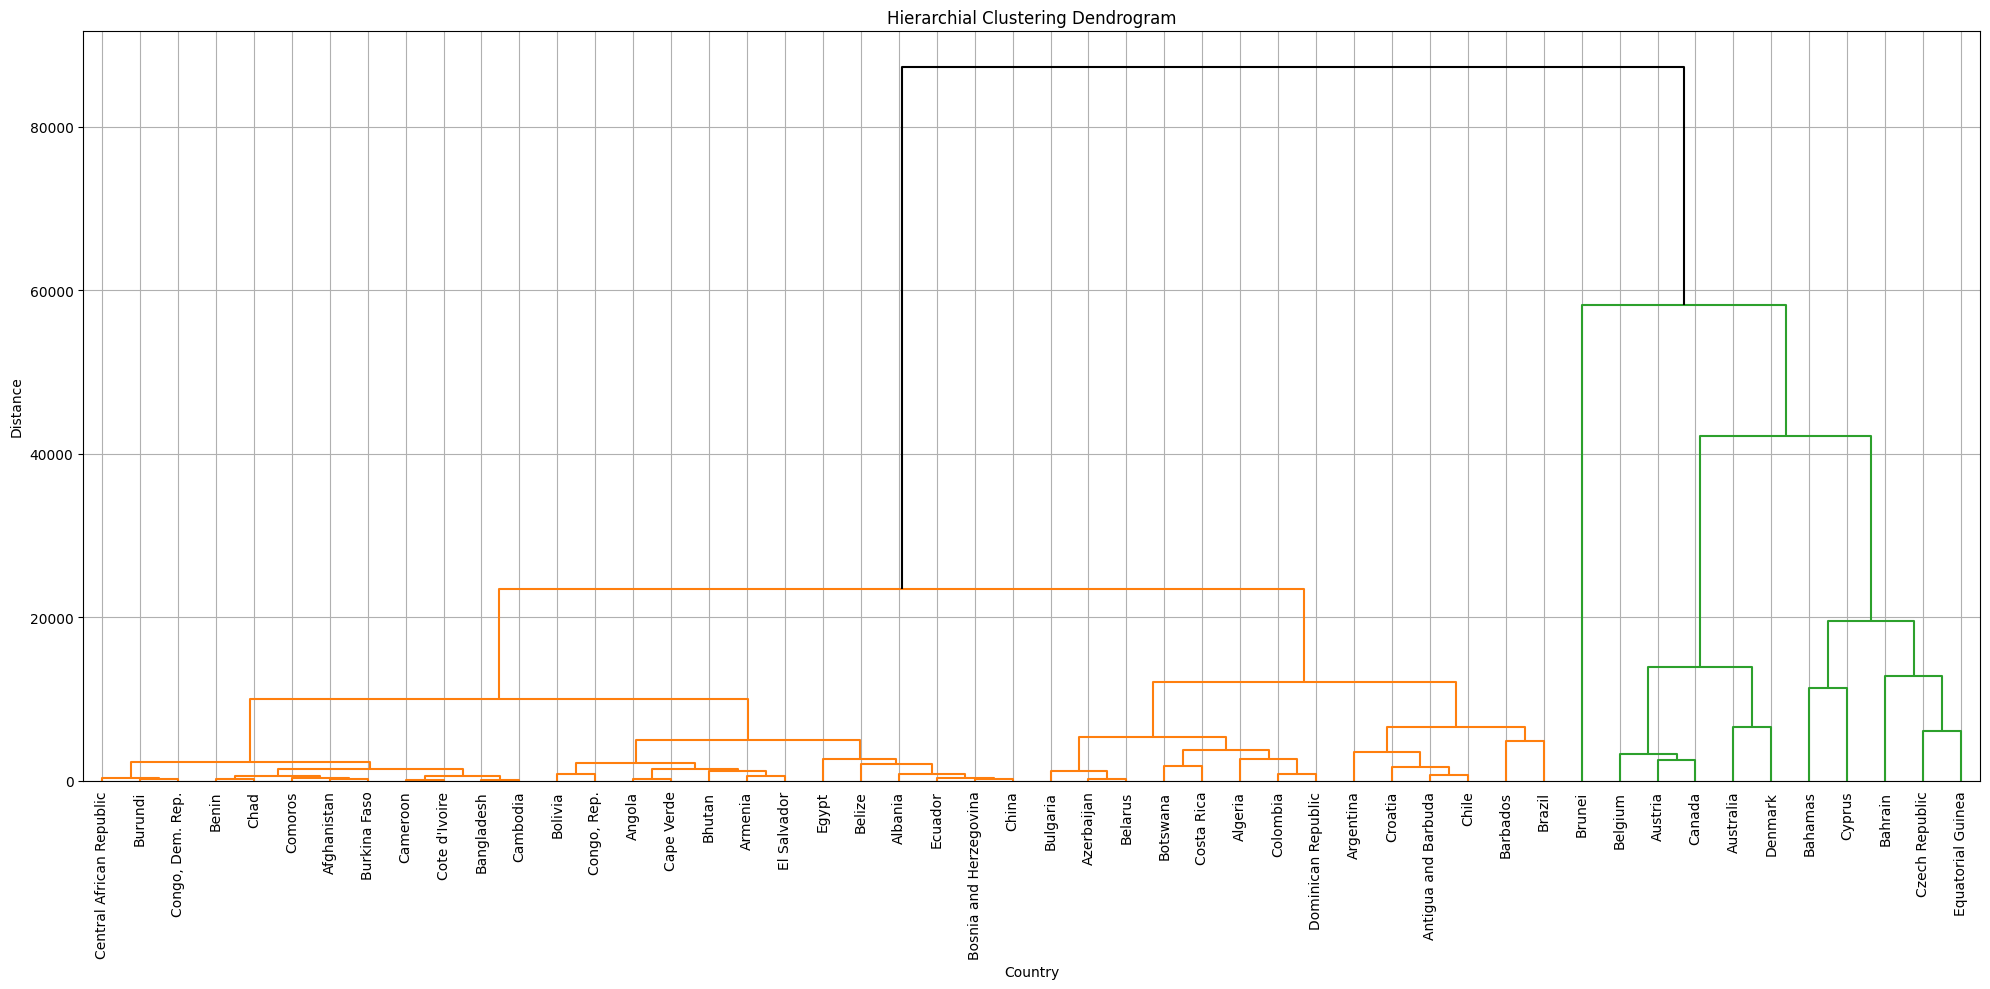

In [15]:
# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points
subset_df = df.iloc[:50]
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',	'gdpp',	'Cluster', 'Cluster_HC']
X_subset = subset_df[features]

# Form Hierarachial/Agglomerative clustering on subset
Z_subset = linkage(X_subset, method='complete')

# Plotting the dendrogram for the subset
plt.figure(figsize=(20,10))
plt.title("Hierarchial Clustering Dendrogram")
dendrogram(Z_subset, labels=subset_df['country'].values, leaf_rotation=90, leaf_font_size=10, above_threshold_color='black')
plt.xlabel("Country")
plt.ylabel("Distance")
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

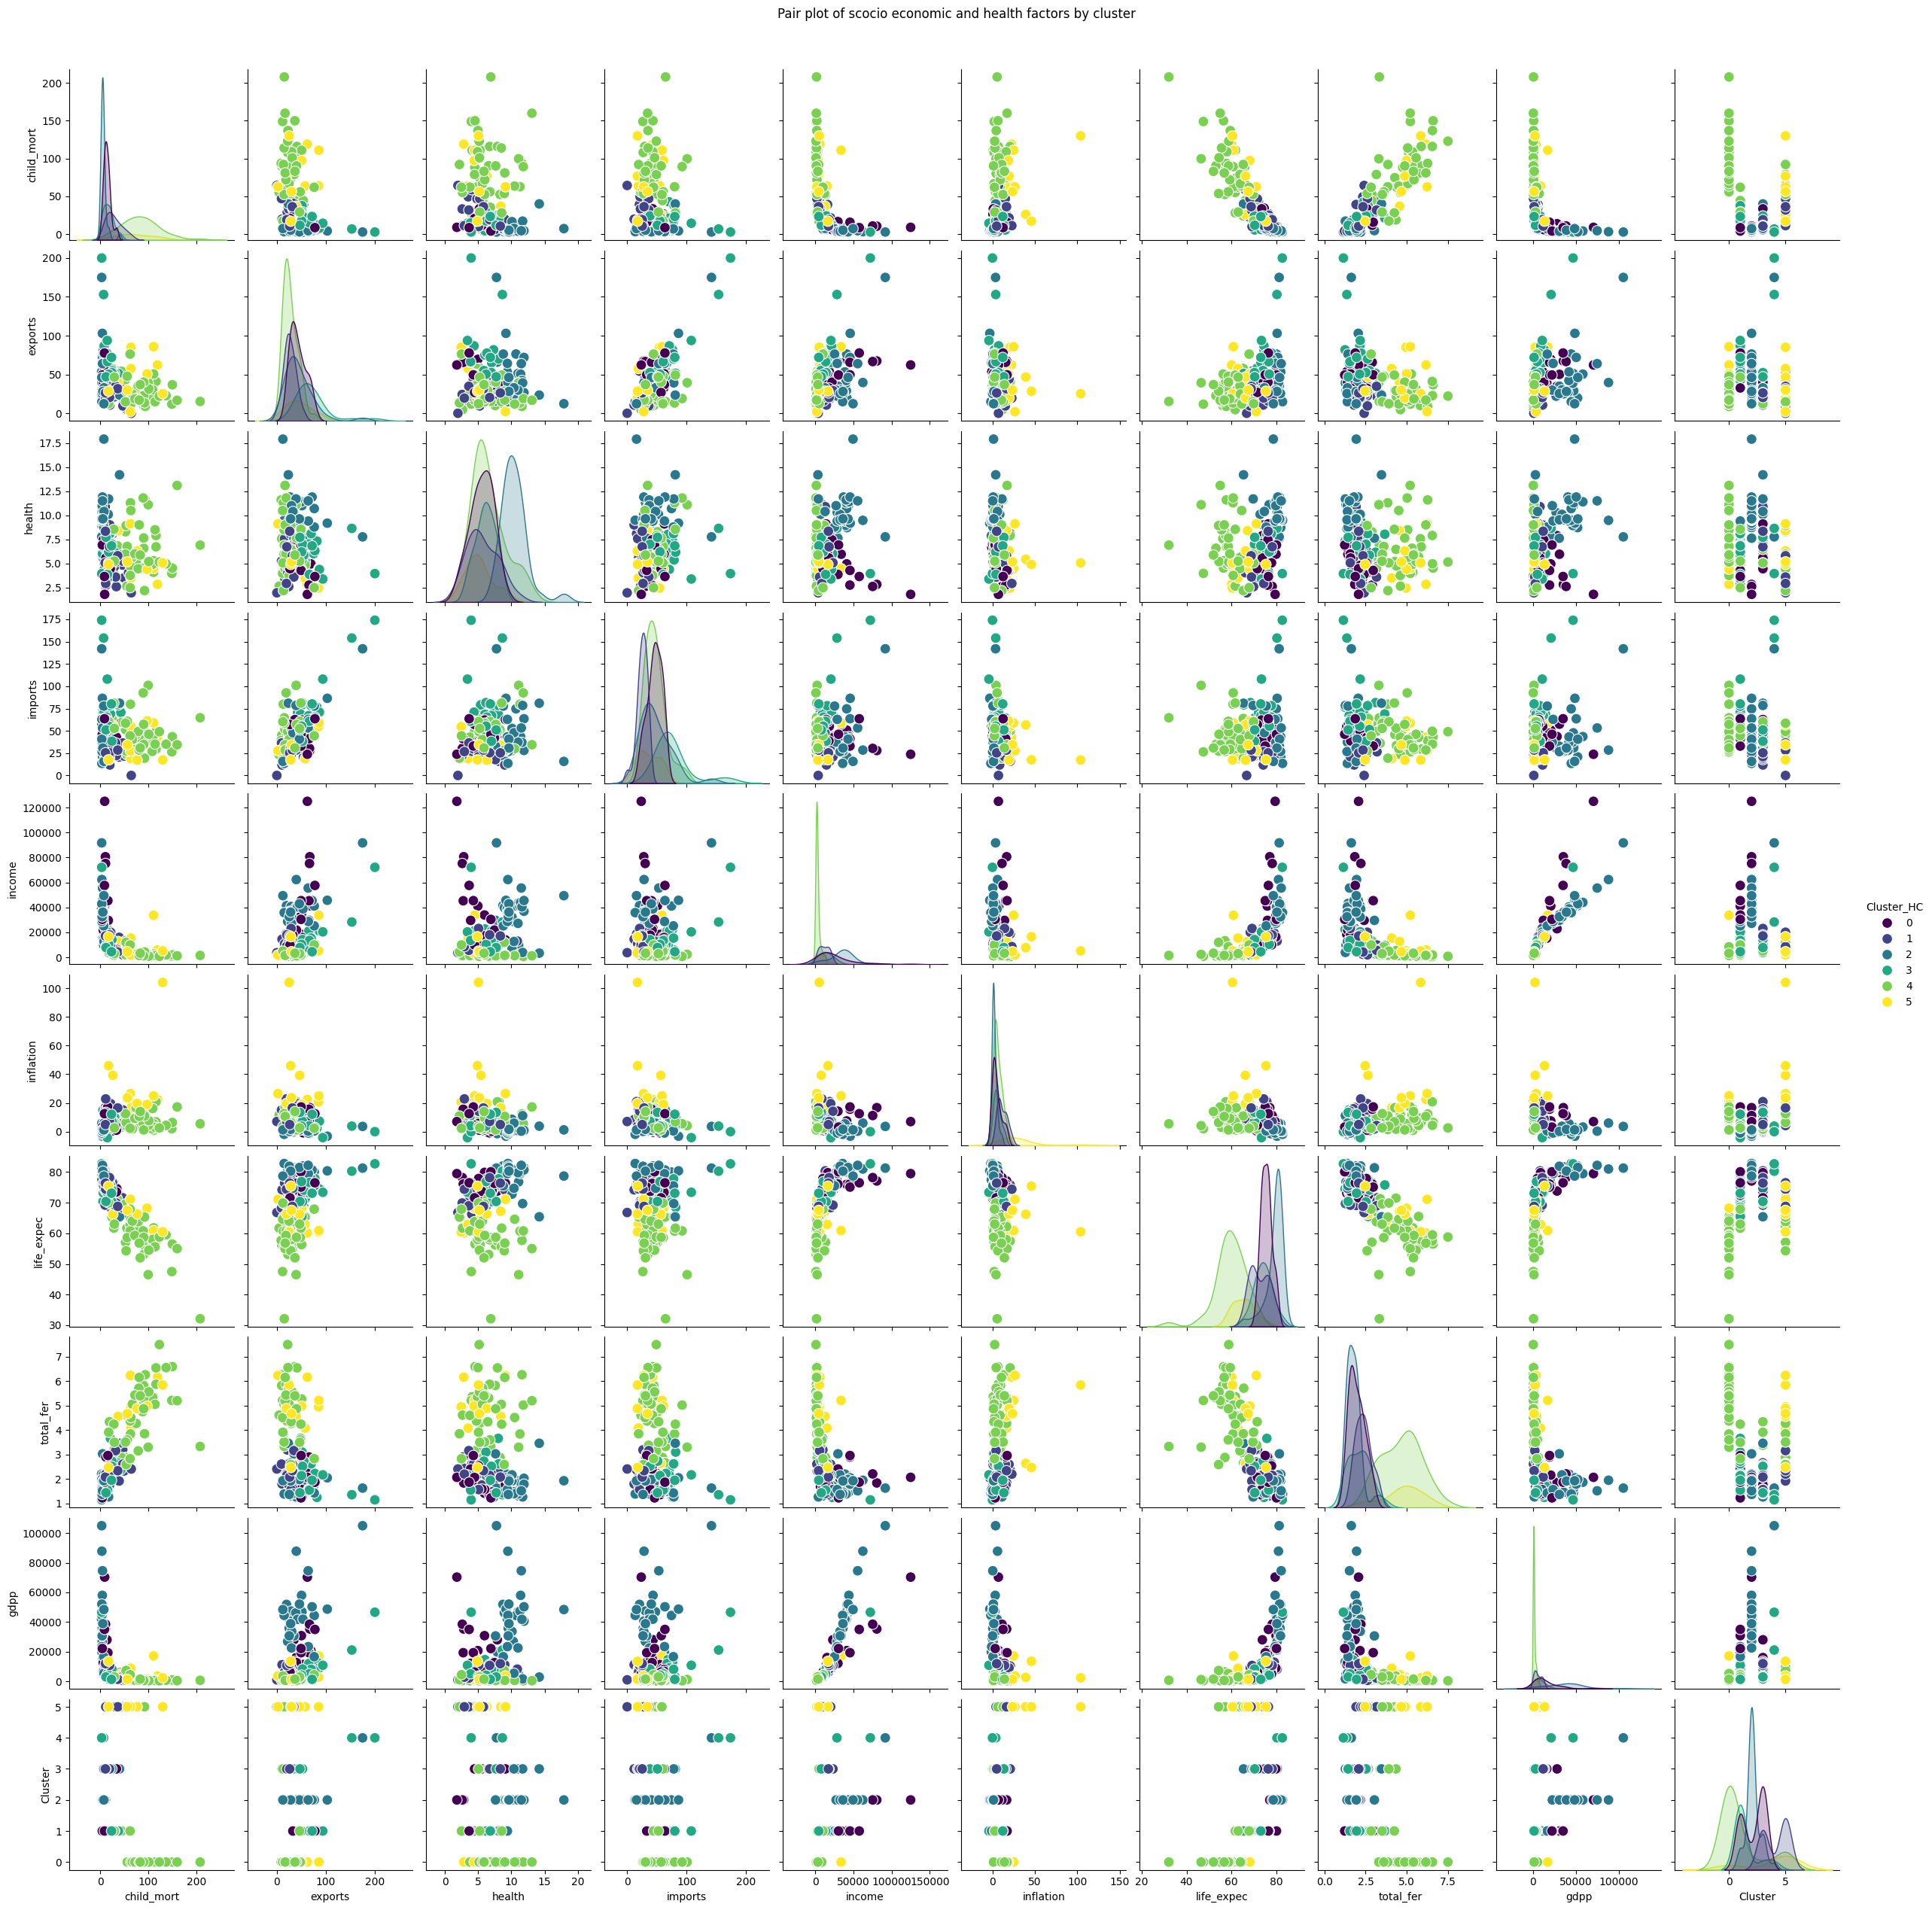

In [16]:
# Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.
pair_plot = sns.pairplot(df, hue='Cluster_HC', palette='viridis', diag_kind = 'kde', plot_kws={'s':100})
pair_plot.fig.suptitle("Pair plot of scocio economic and health factors by cluster", y=1.02)
plt.show()